In [105]:
import pandas as pd
# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                  'machine-learning-databases'
#                  '/breast-cancer-wisconsin/wdbc.data',
#                  header=None)

In [106]:
from sklearn.preprocessing import LabelEncoder
data = pd.read_excel("hour.xlsx")
y = data['season']
X = data.drop(columns = ['instant', 'dteday', 'season'])
# X = df.loc[:, 2:].values
# y = df.loc[:, 1]. values
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)

[1 2 3 4]


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 1)


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc: .3f}')


Test accuracy:  0.590


In [109]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train[train])}, '
          f'Acc.: {score:.3f}')

KeyError: "None of [Index([ 1334,  1336,  1341,  1342,  1345,  1348,  1350,  1355,  1357,  1361,\n       ...\n       13893, 13894, 13895, 13896, 13897, 13898, 13899, 13900, 13901, 13902],\n      dtype='int32', length=12512)] are in the [columns]"

In [59]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')


CV accuracy: 0.950 +/- 0.014


In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = pipe_lr,
                         X = X_train,
                         y = y_train,
                         cv = 10,
                         n_jobs = 1)
print(f'CV accuracy scores: {np.mean(scores):.3f}'
      f' +/- {np.std(scores):.3f}')

CV accuracy scores: 0.950 +/- 0.014


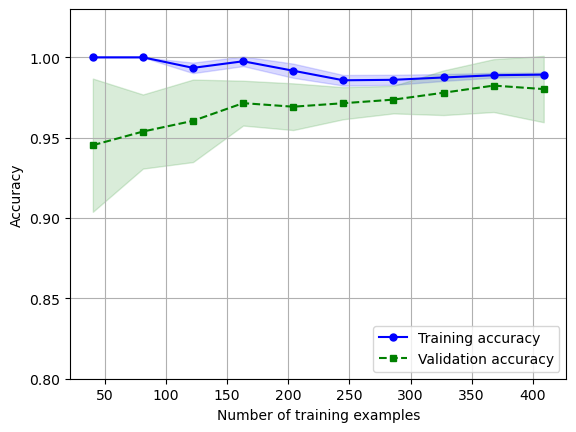

In [61]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           max_iter=10000))
train_sizes, train_scores, test_scores = \
    learning_curve(estimator=pipe_lr,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.linspace(
                       0.1, 1.0, 10),
                       cv=10,
                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()


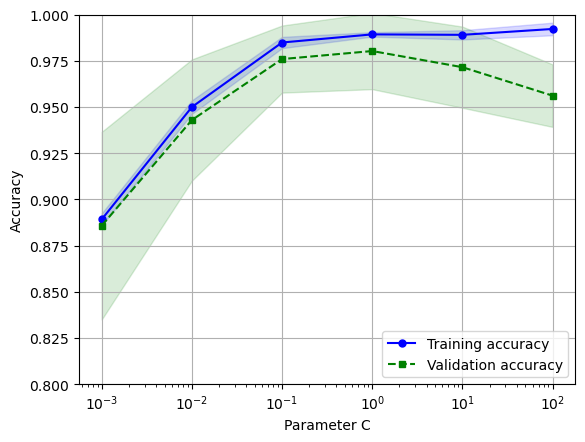

In [62]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator = pipe_lr,
    X = X_train,
    y = y_train,
    param_name = 'logisticregression__C',
    param_range = param_range,
    cv = 10)
train_mean = np.mean(train_scores , axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.plot(param_range, train_mean, color = 'blue',
         marker = 'o', markersize = 5, 
         label = 'Training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha = 0.15,
                 color = 'blue')
plt.plot(param_range, test_mean,
         color = 'green', linestyle = '--',
         marker = 's', markersize = 5,
         label = 'Validation accuracy')
plt.fill_between(param_range,
          test_mean + test_std,
          test_mean - test_std,
          alpha = 0.15, color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state = 1))
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
               {'svc__C': param_range,
                'svc__gamma': param_range,
                'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 10,
                  refit = True,
                  n_jobs = -1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [64]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.974


In [80]:
import scipy.stats
param_range = [0.0001, 0.001, 0.01, 0.1,
                1.0, 10.0, 100.0, 1000.0]
param_range = scipy.stats.loguniform(0.0001, 1000.0)

In [81]:
np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [83]:
from sklearn.model_selection import RandomizedSearchCV
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state = 1))
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
               {'svc__C': param_range,
                'svc__gamma': param_range,
                'svc__kernel': ['rbf']}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)


0.9780676328502416
{'svc__C': 0.05971247755848463, 'svc__kernel': 'linear'}


In [85]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingRandomSearchCV

# hs = HalvingRandomSearchCV(pipe_svc,
#                             param_distributions = param_grid,
#                             n_candidates = 'exhaust',
#                             resource = 'n_samples',
#                             factor = 1.5,
#                             random_state = 1,
#                             n_jobs = -1)

# hs = hs.fit(X_train, y_train)
# print(hs.best_score_)
# print(hs.best_params_)
# clf = hs.best_estimator_
# print(f'Test accuracy: {hs.score(X-test, y_test):.3f}')

In [86]:
param_range = [0.0001, 0.001, 0.01, 0.1,
                1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
               {'svc__C': param_range,
                'svc__gamma': param_range,
                'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 2)
scores = cross_val_score(gs, X_train, y_train,
                         scoring = 'accuracy', cv = 5)
print(f'CV accuracy: {np.mean(scores):.3f}'
      f' +/- {np.std(scores):.3f}')

CV accuracy: 0.974 +/- 0.015


In [87]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 0),
    param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
    scoring = 'accuracy',
    cv = 2
)
scores = cross_val_score(gs, X_train, y_train,
                         scoring = 'accuracy', cv = 5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f' +/- {np.std(scores):.3f}')


CV accuracy: 0.934  +/- 0.016


In [88]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


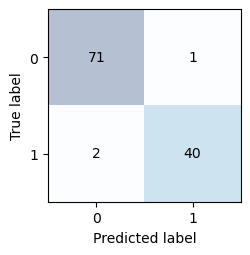

In [89]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j],
                va = 'center', ha = 'center')
        
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [92]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true = y_test, y_pred = y_pred)
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true = y_test, y_pred = y_pred)
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true = y_test, y_pred = y_pred)
print(f'F1: {f1_val:.3f}')

mcc_val = matthews_corrcoef(y_true = y_test, y_pred = y_pred)
print(f'MCC: {mcc_val:.3f}')

Precision: 0.976
Recall: 0.952
F1: 0.964
MCC: 0.943


In [96]:
from sklearn.metrics import make_scorer
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
               {'svc__C': c_gamma_range,
                'svc__gamma': c_gamma_range,
                'svc__kernel': ['rbf']}]
scorer = make_scorer(f1_score, pos_label = 0)
gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = scorer,
                  cv = 10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


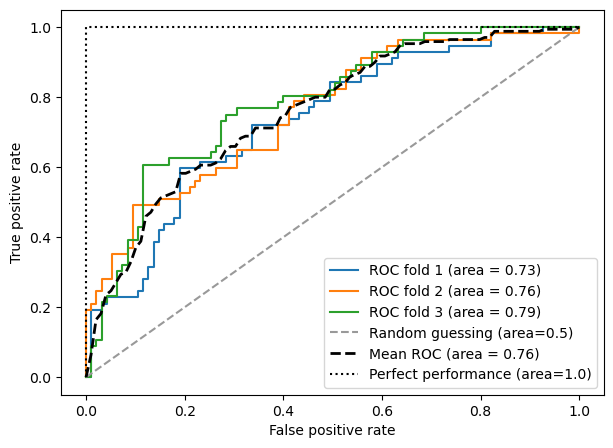

In [97]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components = 2),
    LogisticRegression(penalty = 'l2', random_state = 1,
                       solver = 'lbfgs', C = 100.0)
)
X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
     probas = pipe_lr.fit(
          X_train2[train],
          y_train[train]).predict_proba(X_train2[test])
     fpr, tpr, thresholds = roc_curve(y_train[test],
                                      probas[:, 1],
                                      pos_label=1)
     mean_tpr += interp(mean_fpr, fpr, tpr)
     mean_tpr[0] = 0.0
     roc_auc = auc(fpr, tpr)
     plt.plot(fpr,
              tpr,
              label=f'ROC fold {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area=0.5)')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area=1.0)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [99]:
pre_scorer = make_scorer(score_func = precision_score,
                         pos_label = 1,
                         greater_is_better = True,
                         average = 'micro')

In [102]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [103]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [104]:
from sklearn.utils import resample
print('Number of class 1 examples before: ',
      X_imb[y_imb == 1].shape[0])
X_upsampled, y_upsampled = resample(
    X_imb[y_imb == 1],
    y_imb[y_imb == 1],
    replace = True,
    n_samples = X_imb[y_imb == 0].shape[0],
    random_state = 123)
print('Number of class 1 examples after: ',X_upsampled.shape[0])

X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

Number of class 1 examples before:  40
Number of class 1 examples after:  357


50.0